In [1]:
import pandas as pd
df = pd.read_csv("Admission_Predict.csv",sep = ",")

In [2]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [4]:
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
354,355,297,98,2,2.5,3.0,7.67,0,0.59
244,245,314,107,2,2.5,4.0,8.56,0,0.63
113,114,320,110,2,4.0,3.5,8.56,0,0.72
145,146,320,113,2,2.0,2.5,8.64,1,0.81
336,337,319,110,3,3.0,2.5,8.79,0,0.72


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['GRE Score'],df['CGPA'])
plt.title("CGPA vs GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()


<Figure size 640x480 with 1 Axes>

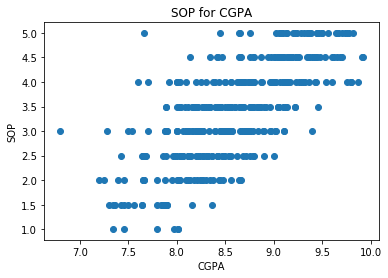

In [7]:
plt.scatter(df["CGPA"],df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()


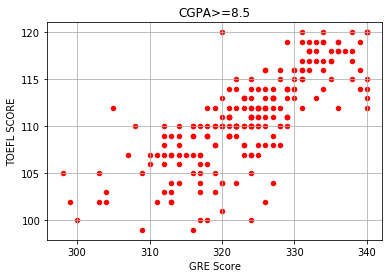

In [8]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

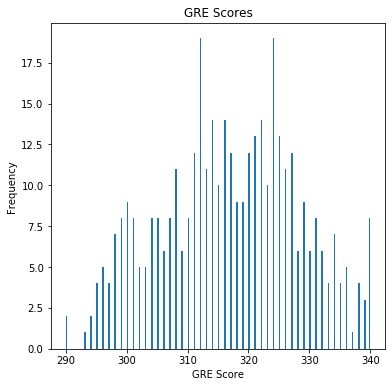

In [9]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

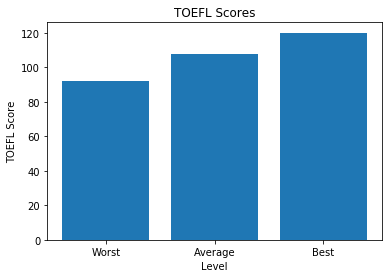

In [10]:
import numpy as np
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()


In [11]:
df.dtypes
df.shape



(400, 9)

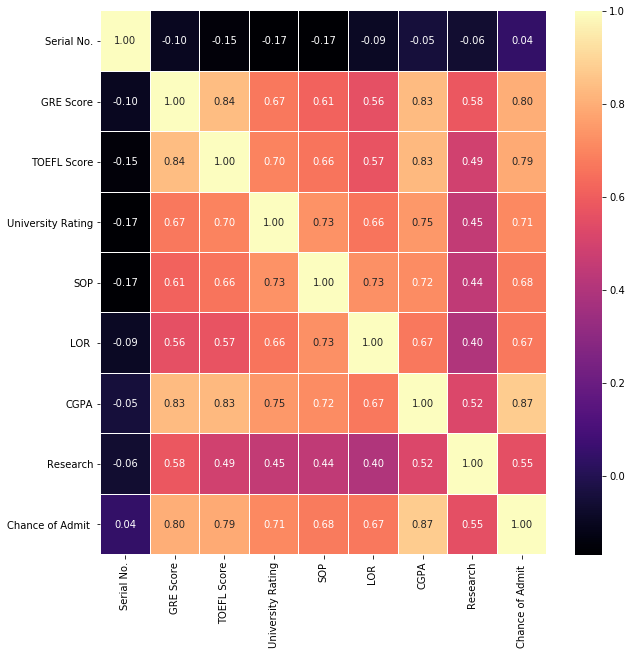

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [13]:
df.Research.value_counts()

1    219
0    181
Name: Research, dtype: int64

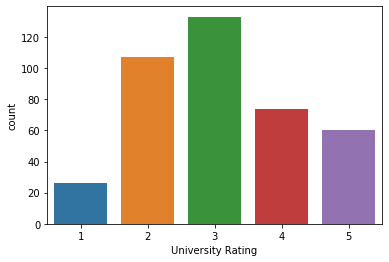

In [14]:
sns.countplot(x="University Rating",data=df)
plt.show()

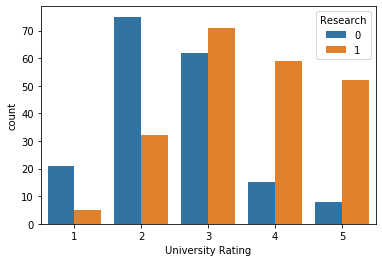

In [15]:
sns.countplot(x="University Rating",hue="Research",data=df)


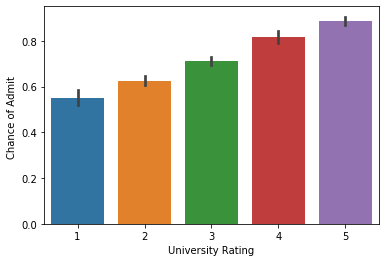

In [16]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=df)

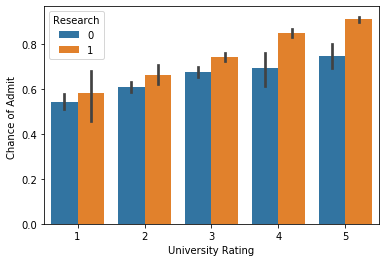

In [17]:
sns.barplot(x="University Rating", y="Chance of Admit ", hue="Research", data=df)

In [18]:
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})


In [19]:
y = df["Chance of Admit"]

x = df.drop(["Chance of Admit"],axis=1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)
x_train
y_test

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
84     0.94
329    0.43
94     0.36
266    0.72
126    0.85
9      0.45
361    0.93
56     0.64
72     0.93
132    0.71
42     0.53
278    0.66
376    0.34
231    0.74
385    0.96
77     0.64
15     0.54
391    0.71
271    0.54
0      0.92
396    0.84
114    0.59
225    0.61
262    0.70
104    0.74
       ... 
46     0.86
321    0.73
338    0.81
70     0.94
374    0.39
39     0.48
223    0.71
172    0.86
30     0.65
152    0.86
124    0.57
294    0.61
255    0.79
78     0.44
101    0.64
31     0.74
352    0.64
268    0.83
394    0.89
73     0.84
320    0.75
140    0.84
5      0.90
45     0.88
388    0.49
246    0.72
227    0.64
369    0.67
176    0.90
289    0.79
Name: Chance of Admit, Length: 80, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])
x_train


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
18,0.56,0.642857,0.50,0.750,0.500,0.641026,0.0
202,1.00,1.000000,1.00,0.875,0.875,0.996795,1.0
250,0.60,0.428571,0.50,0.500,0.375,0.567308,1.0
274,0.50,0.285714,0.00,0.250,0.375,0.368590,0.0
63,0.50,0.535714,0.25,0.750,0.500,0.544872,1.0
248,0.68,0.642857,0.50,0.625,0.750,0.663462,1.0
301,0.58,0.571429,0.25,0.375,0.500,0.628205,0.0
108,0.82,0.857143,1.00,1.000,1.000,0.826923,1.0
90,0.56,0.500000,0.25,0.750,0.750,0.358974,1.0


In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)


score=model.score(x_test, y_test)
print(score)






0.821208259148699


In [23]:
print (y_predict[0:5])

print(y_test[0:5])

[0.65117446 0.72368741 0.93536809 0.82164316 0.58158673]
209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
Name: Chance of Admit, dtype: float64


In [ ]:
gre=int(input("What is your GRE Score (between 290 to 340):"))
toefl=int(input("What is your TOEFL Score (between 90 to 120):"))
univ=int(input("What is your University Rating ( 1 to 5 ):"))
sop=int(input("Rate your Statement of Purpose ( 1 to 5):"))
lor=int(input("What is strength of  your Letter of Recommendation ( 1 to 5) :"))
cgpa=int(input("What is your CGPA ( 6 to 10):"))
research=int(input("Do You have Research Experience (Enter 0 for No and 1 for Yes:"))

newx=[[gre,toefl,univ,sop,lor,cgpa,research]]

newy=model.predict(newx)

print("Your Chance of Admission is: ",newy)





In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)
y_predict_rfr = rfr.predict(x_test) 

score_rfr=rfr.score(x_test, y_test)
print(score_rfr)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_predict_dtr = dtr.predict(x_test) 

score_dtr=dtr.score(x_test, y_test)
print(score_dtr)

In [ ]:
print('Coefficients: \n', model.coef_)
print(model.intercept_)

In [ ]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

In [ ]:
import numpy as np
red = plt.scatter(np.arange(0,80,5),y_predict[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_predict_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_predict_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()